# Pretreatment

##  Dataset


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn import tree

from sklearn.preprocessing import LabelEncoder

**Create Dataset**

This Dataset is about clothes with 11 features.

The following are mean of the these feature：



1.   TID
2.   Price
3.   Sex
4.   Categroy
5.   Color
6.   Size

7.   Brand
8.   Material
9.   Origin
10.  Sales channel
11.  Season
12.  s/n



In [ ]:
data_num=1000

In [ ]:
# Define column name
colunms_name=['TID','Sex','Price','Category','Color','Size','Brand','Material','Origin','Sales_channel','Season']
colunms_name_list=[colunms_name[i]+'_data_list' for i in range(1,len(colunms_name))]
colunms_list=[colunms_name[i]+'_list' for i in range(1,len(colunms_name))]

In [ ]:
# Create Freature content
TID_list=[i for i in range(data_num)]

Price_list=[i*100 for i in range(1,21)]

Sex_list=['male','female']

Category_list=['shoes','pants','jack','shirt','suit','vest','coat','sweater','garter','louse','uniforms','dress']

Color_list=['black','white','yellow','red','orange','green','blue','purple','pink','Brown']

Size_list=['XSS','XS','S','M','L','XL','XXL','XXXL']

Brand_list=['Unique','NET','H&M','Zara','GAP','GU','Adidas','NIKE']

Material_list=['cotton','polyester','nylon','acrylic','linen','silk','rayon'
,'acetate','spandex','lycra']

Origin_list=['America','Taiwan','China','Canada','Japan','Europe','Korea']

Sales_channel_list=['Internet','shopee','amazon','Adidas','Storefront']

Season_list=['spring','summer','winter','fall']

In [ ]:
def get_random_data(list,data_num):
  list_data=[random.choice(list) for i in range(data_num)]
  return list_data

In [ ]:
for i in range(len(colunms_name_list)):
  locals()[colunms_name_list[i]]=get_random_data(eval(colunms_list[i]),data_num)

In [ ]:
data={colunms_name[i]:eval(colunms_name_list[i-1]) for i in range(1,len(colunms_name))}
df=pd.DataFrame(data)
df['TID']=TID_list
df=df[colunms_name]


In [ ]:
df.to_csv('clothes.csv',index=False,header=True)

In [ ]:
le = LabelEncoder()      
for i in range(2,len(colunms_name)):
  le.fit(df[colunms_name[i]])                         
  df[colunms_name[i]]= le.transform(df[colunms_name[i]])  

In [ ]:
df.to_csv('clothes_num.csv',index=False,header=True)

In [ ]:
data={colunms_name[i]:eval(colunms_name_list[i-1]) for i in range(1,len(colunms_name))}
df=pd.DataFrame(data)
df['TID']=TID_list
df=df[colunms_name]

## Rule

In [ ]:
Rule_list_fem=[[],
           [i*100 for i in range(1,4)],['dress'],
           [],
           ['S'],
           ['Zara'],
           ['rayon'],
           ['Korea'],
           [],
           []
           ]

Rule_list_m=[[],
           [i*100 for i in range(1,3)],['pants','vest'],
           ['white'],
           ['L'],
           ['Unique'],
           [],
           ['Taiwan'],
           [],
           []
           ]

In [ ]:
df['s/n']=np.nan
for i in range(len(df)):
  stu=0
  if df['Sex'][i]=='male':
    for j in range(1,len(colunms_name)):
        # if j==len(colunms_name)-3:
        #   if df[colunms_name[j]][i] == random.choice(Origin_data_list):
        #     df['s/n'][i]='sell'
        #     stu=1
        if df[colunms_name[j]][i] in Rule_list_m[j-1]:
          df['s/n'][i]='sell'
          stu=1
    if stu==0:
      df['s/n'][i]='fail'

  if df['Sex'][i]=='female':
    for j in range(1,len(colunms_name)):
        # if j==len(colunms_name)-3:
        #   if df[colunms_name[j]][i] == random.choice(Origin_data_list):
        #     stu=1
        #     df['s/n'][i]='sell'

        if df[colunms_name[j]][i] in Rule_list_fem[j-1]:
          df['s/n'][i]='sell'
          stu=1
    if stu==0:
      df['s/n'][i]='fail'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14:

In [ ]:
df.groupby(['s/n']).count()

,TID,Sex,Price,Category,Color,Size,Brand,Material,Origin,Sales_channel,Season
s/n,,,,,,,,,,,
fail,435,435,435,435,435,435,435,435,435,435,435
sell,565,565,565,565,565,565,565,565,565,565,565


In [ ]:
df.to_csv('result_my.csv',index=False,header=True)

In [ ]:
le = LabelEncoder()      
for i in range(1,len(colunms_name)):
  le.fit(df[colunms_name[i]])                         
  df[colunms_name[i]]= le.transform(df[colunms_name[i]])  

le.fit(df['s/n'])
df['s/n']=le.transform(df['s/n'])

In [ ]:
df.to_csv('result_my_num.csv',index=False,header=True)

# scikit-learn 套件應用

## Import 

In [ ]:
import sklearn

# 處理資料時會用到的工具

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 儲存模型的工具
import pickle

## Pretreatment

In [ ]:
train_df = pd.read_csv('result_my_num.csv') # 讀取訓練資料
train_df.head(5)                                   

,TID,Sex,Price,Category,Color,Size,Brand,Material,Origin,Sales_channel,Season,s/n
0,0,0,17,8,3,2,7,0,4,1,2,1
1,1,0,10,5,4,0,4,6,2,3,3,0
2,2,0,8,9,2,0,6,2,5,2,2,1
3,3,1,11,6,2,5,7,8,3,2,0,0
4,4,0,12,6,7,1,2,9,0,2,2,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TID            1000 non-null   int64
 1   Sex            1000 non-null   int64
 2   Price          1000 non-null   int64
 3   Category       1000 non-null   int64
 4   Color          1000 non-null   int64
 5   Size           1000 non-null   int64
 6   Brand          1000 non-null   int64
 7   Material       1000 non-null   int64
 8   Origin         1000 non-null   int64
 9   Sales_channel  1000 non-null   int64
 10  Season         1000 non-null   int64
 11  s/n            1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [ ]:
train_df.describe()

,TID,Sex,Price,Category,Color,Size,Brand,Material,Origin,Sales_channel,Season,s/n
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.519000,9.444000,5.302000,4.457000,3.452000,3.50600,4.504000,2.981000,1.940000,1.509000,0.565000
std,288.819436,0.499889,5.759691,3.365133,2.902512,2.305865,2.31891,2.857998,2.086862,1.397266,1.099604,0.496005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,0.000000,4.000000,2.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,499.500000,1.000000,9.000000,5.000000,4.000000,3.000000,4.00000,5.000000,3.000000,2.000000,2.000000,1.000000
75%,749.250000,1.000000,14.000000,8.000000,7.000000,5.000000,6.00000,7.000000,5.000000,3.000000,2.000000,1.000000
max,999.000000,1.000000,19.000000,11.000000,9.000000,7.000000,7.00000,9.000000,6.000000,4.000000,3.000000,1.000000


In [ ]:
columns=['Sex','Price','Category','Color','Size','Brand','Material','Origin','Sales_channel','Season']
train_x = train_df[columns]  # 取出訓練資料需要分析的資料欄位
train_y = train_df['s/n']     # 取出訓練資料的答案

In [ ]:
# 任務類型 & 標記資料
# 本範例使用 titanic 資料集，所以為類別預測 + 監督式學習

from sklearn.tree import DecisionTreeClassifier # 匯入決策樹模型
from sklearn.metrics import accuracy_score      # 匯入準確度計算工具

model = DecisionTreeClassifier()                # 創造決策樹模型
model.fit(train_x, train_y)                     # 訓練決策樹模型

pred_y = model.predict(train_x)                 # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)           # 計算準確度

print('accuracy: {}'.format(acc))               # 輸出準確度

accuracy: 1.0


## Model

In [ ]:
# 驗證資料

from sklearn.model_selection import train_test_split # 匯入分離訓練資料與驗證資料的工具
from sklearn.tree import DecisionTreeClassifier      # 匯入決策樹模型
from sklearn.metrics import accuracy_score           # 匯入準確度計算工具

(train_x_split, valid_x_split,
 train_y_split, valid_y_split) = train_test_split(   # 分離訓練資料與驗證資料
    train_x,                                         # 原始訓練資料
    train_y,                                         # 原始訓練資料標記
    test_size=0.33,                                  # 分離比例
    random_state=1012                                # 控制隨機亂數
)

model = DecisionTreeClassifier(random_state=1012)    # 創造決策樹模型
model.fit(train_x_split, train_y_split)              # 訓練決策樹模型

train_pred_y = model.predict(train_x_split)          # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split,            # 計算訓練資料準確度
                           train_pred_y)
valid_pred_y = model.predict(valid_x_split)          # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split,            # 計算驗證資料準確度
                           valid_pred_y)

print('train accuracy: {}'.format(train_acc))        # 輸出訓練準確度
print('valid accuracy: {}'.format(valid_acc))        # 輸出驗證準確度


train accuracy: 1.0
valid accuracy: 0.7484848484848485


In [ ]:
# 交叉驗證

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=3,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)


    
print((
    'average train accuracy: {}\n' +
    'min train accuracy: {}\n' +
    'max train accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list)                            # 輸出最高訓練準確度
))
print()
print((
    'average valid accuracy: {}\n' +
    'min valid accuracy: {}\n' +
    'max valid accuracy: {}').format(
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

average train accuracy: 1.0
min train accuracy: 1.0
max train accuracy: 1.0

average valid accuracy: 0.756954559349769
min valid accuracy: 0.6936936936936937
max valid accuracy: 0.8023952095808383


accuracy: 0.718


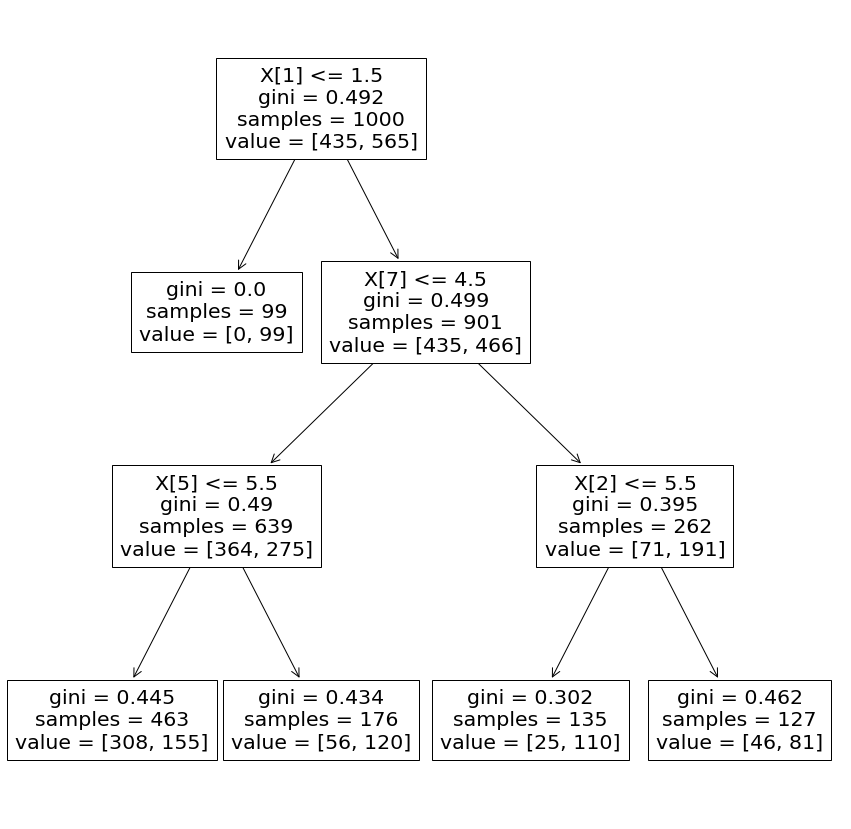

In [ ]:
# 類別預測 & 視覺化

from sklearn.tree import DecisionTreeClassifier # 匯入決策樹模型
from sklearn.tree import plot_tree              # 匯入決策樹繪圖工具
from sklearn.metrics import accuracy_score      # 匯入準確度計算工具

model = DecisionTreeClassifier(                 # 創造決策樹模型
    criterion='gini',                           # 設定最佳化方法為 Gini Index
    max_depth=3,                                # 設定最大深度為 3
    max_leaf_nodes=2 ** 3)                      # 設定最多葉子個數為 8
model.fit(train_x, train_y)                     # 訓練決策樹模型

pred_y = model.predict(train_x)                 # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)           # 計算準確度

print('accuracy: {}'.format(acc))               # 輸出準確度

fig, ax = plt.subplots(figsize=(15, 15))        # 創造繪圖環境

plot_tree(model, ax=ax)                         # 繪製訓練後的模型

plt.show()                                      # 繪製圖表

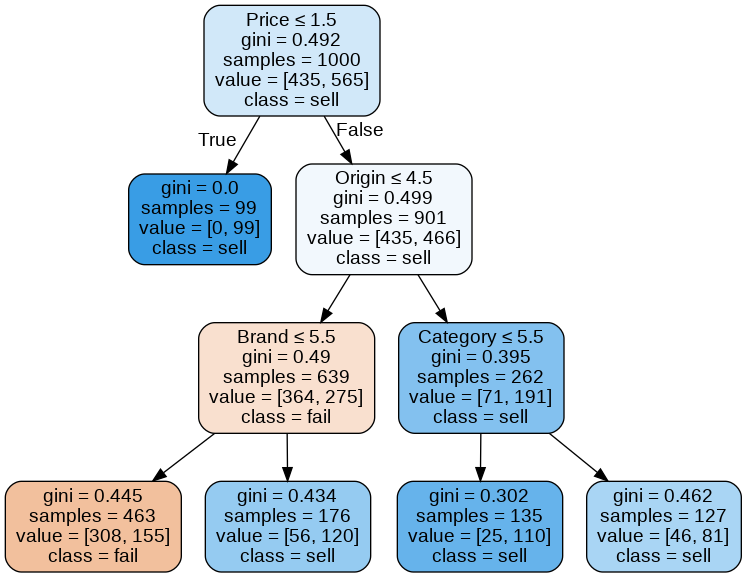

In [ ]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['fail','sell'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [281]:
df_res=df
df_res['pred']=pred_y

In [283]:
list=[]
for i in range(len(df_res)):
  if df['s/n'][i]== df['pred'][i]:
    list.append(i)
df_res=df_res.drop(list)

In [284]:
df_res

,TID,Sex,Price,Category,Color,Size,Brand,Material,Origin,Sales_channel,Season,s/n,pred
3,3,1,11,6,2,5,7,8,3,2,0,0,1
12,12,0,11,1,2,4,3,6,2,2,2,1,0
17,17,1,5,11,6,0,4,3,3,1,2,1,0
24,24,1,5,4,3,0,3,9,0,4,0,1,0
26,26,0,6,0,2,5,3,7,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,984,0,13,9,8,6,6,2,0,0,0,0,1
985,985,1,11,6,8,6,0,3,3,2,2,1,0
988,988,1,4,2,6,6,5,4,5,4,3,0,1
996,996,0,18,8,5,2,0,2,3,2,2,1,0


In [285]:
df_res.groupby(['pred']).count()

,TID,Sex,Price,Category,Color,Size,Brand,Material,Origin,Sales_channel,Season,s/n
pred,,,,,,,,,,,,
0,155,155,155,155,155,155,155,155,155,155,155,155
1,127,127,127,127,127,127,127,127,127,127,127,127
